In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import multiprocess

%cd G:\My Drive

G:\My Drive


In [8]:
PATH = 'G:/My Drive/data/'
TRAIN_PATH = 'train/'

In [9]:
from PIL import Image, ImageOps
import os
import numpy as np
import re
import random

In [10]:
IMAGE_HEIGHT = 148
IMAGE_WIDTH = 148

In [11]:
def load_data(path, count, X, Y, filenames, index):
    cats = 0
    dogs = 0
    for i in range(index * count, (index + 1) * count):
        filename = filenames[i]
        try:
            if (filename.split('.')[0] == 'cat'):
                if (cats >= count / 2):
                    continue
                Y[i][0] = 1
                Y[i][1] = 0
                cats += 1
            else:
                if (dogs >= count / 2):
                    continue
                Y[i][0] = 0
                Y[i][1] = 1
                dogs += 1
            img = cv.imread(path + filename)
            img = cv.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))

            # Denoise the image
            img = cv.fastNlMeansDenoisingColored(img)

            # Apply canny edge detection
            img = cv.Canny(img, 100, 200)


            for x in range(len(img)):
                for y in range(len(img[0])):
                    X[i][x][y] = img[x][y]
        except Exception as e:
            print(e);
            print('ERROR: failed to load data')
            print(i)
            continue
        if cats + dogs == count:
            break

In [12]:
 #Load the data
DATA_SIZE = 10000
filenames = os.listdir(PATH + TRAIN_PATH)
X = np.zeros((DATA_SIZE, IMAGE_WIDTH, IMAGE_HEIGHT, 3))
Y = np.zeros((DATA_SIZE, 2))
random.shuffle(filenames)
load_data(PATH + TRAIN_PATH, DATA_SIZE, X, Y, filenames, 0)

# Define training and testing data

In [13]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y)

print(len(x_train), len(x_test))

# Garbage collection
X = None
Y = None

7500 2500


In [14]:
x_train = np.asarray(x_train).astype(np.uint8) / 255
y_train = np.asarray(y_train).astype(np.uint8)
x_test = np.asarray(x_test).astype(np.uint8) / 255
y_test = np.asarray(y_test).astype(np.uint8)

In [15]:
EPOCHS = 15

In [16]:
input_shape = x_train[0].shape;

(148, 148, 3)


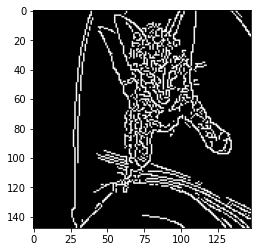

In [17]:
print(input_shape)
plt.imshow(x_train[1])

In [18]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", activation="relu", input_shape=input_shape))
model.add(Conv2D(8, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 8)       584       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 8)      32        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 8)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 16)        1

In [19]:
model.compile(loss='categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/15
235/235 [==============================] - 11s 30ms/step - loss: 0.7425 - accuracy: 0.5989 - val_loss: 4.1450 - val_accuracy: 0.5364
Epoch 2/15
235/235 [==============================] - 6s 26ms/step - loss: 0.5974 - accuracy: 0.6864 - val_loss: 2.3176 - val_accuracy: 0.6176
Epoch 3/15
235/235 [==============================] - 6s 26ms/step - loss: 0.6011 - accuracy: 0.6885 - val_loss: 2.4294 - val_accuracy: 0.5600
Epoch 4/15
235/235 [==============================] - 6s 26ms/step - loss: 0.5979 - accuracy: 0.6912 - val_loss: 0.6880 - val_accuracy: 0.5848
Epoch 5/15
235/235 [==============================] - 6s 26ms/step - loss: 0.5564 - accuracy: 0.7203 - val_loss: 0.5557 - val_accuracy: 0.7208
Epoch 6/15
235/235 [==============================] - 6s 26ms/step - loss: 0.5277 - accuracy: 0.7412 - val_loss: 0.5151 - val_accuracy: 0.7440
Epoch 7/15
235/235 [==============================] - 6s 26ms/step - loss: 0.5144 - accuracy: 0.7525 - val_loss: 0.5233 - val_accuracy: 0.735

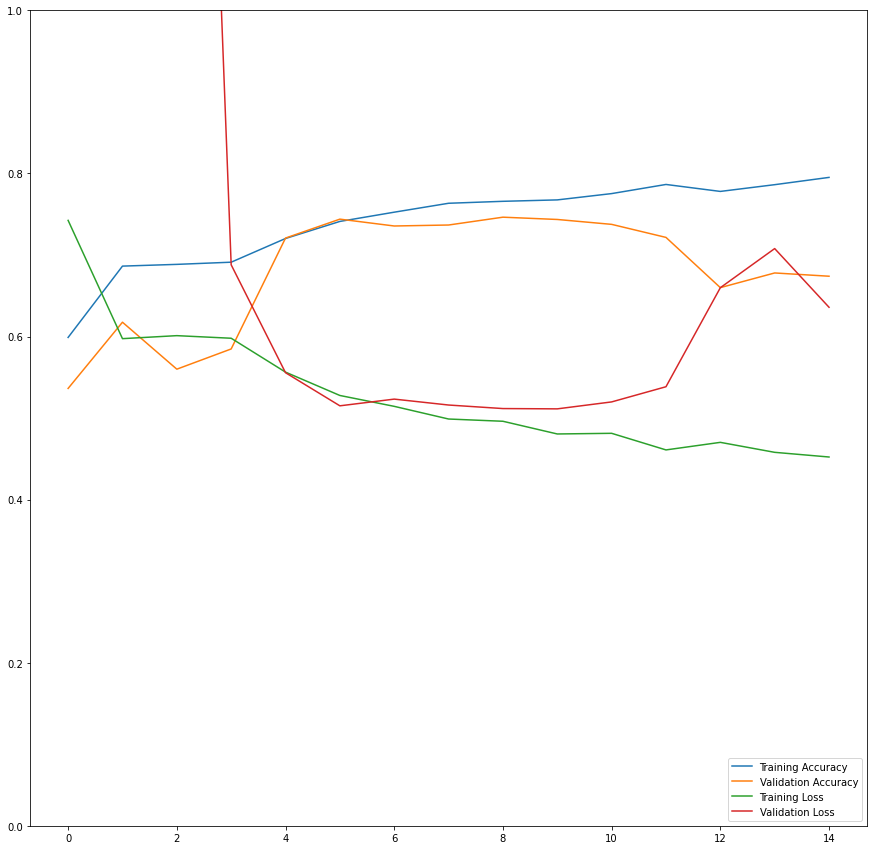

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('')
plt.ylim([0, 1])
plt.show()